<p>Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.</p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [2]:
df = pd.read_pickle("datos/peliculas_limpio.pkl")
df.head(2)

,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4,IMDB_Rating,Meta_score,No_of_Votes,Gross,Rating_BOX
0,The Shawshank Redemption,1994,A,142 min,Drama,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,9.3,80.0,2343110.0,28341469.0,0.100485
1,The Godfather,1972,A,175 min,"Crime, Drama",An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,9.2,100.0,1620367.0,134966411.0,0.100485


<p> Hemos hecho una selección de columnas numéricas dentro de las variables predictoras y hemos eliminado la variable respuesta porque la estandarización se aplica únicamente sobre las variables predictoras. </p>

In [3]:
variables_predictoras = df.select_dtypes(include=np.number)
variables_predictoras.drop(['IMDB_Rating', 'Rating_BOX'], axis=1,inplace=True)
variables_predictoras.head(2)

,Meta_score,No_of_Votes,Gross
0,80.0,2343110.0,28341469.0
1,100.0,1620367.0,134966411.0


In [4]:
variables_predictoras.describe().T

,count,mean,std,min,25%,50%,75%,max
Meta_score,1000.0,7.868839e+01,1.157791e+01,28.0,72.00,8.002396e+01,86.00,100.0
No_of_Votes,1000.0,2.736929e+05,3.273727e+05,25088.0,55526.25,1.385485e+05,374161.25,2343110.0
Gross,1000.0,6.043001e+07,1.015420e+08,1305.0,5012919.25,2.083069e+07,62160005.00,936662225.0


<p>1. Manual </p>

In [5]:
media_meta = variables_predictoras['Meta_score'].mean()
media_votes = variables_predictoras['No_of_Votes'].mean()
media_gross = variables_predictoras['Gross'].mean()
std_meta = variables_predictoras['Meta_score'].std()
std_votes = variables_predictoras['No_of_Votes'].std()
std_gross = variables_predictoras['Gross'].std()

In [6]:
variables_predictoras['Meta_ESTA'] = (variables_predictoras['Meta_score']- media_meta)/std_meta

In [7]:
variables_predictoras['Votes_ESTA'] = (variables_predictoras['No_of_Votes'] - media_votes)/std_votes

In [8]:
variables_predictoras['Gross_ESTA'] = (variables_predictoras['Gross']-media_gross)/std_gross

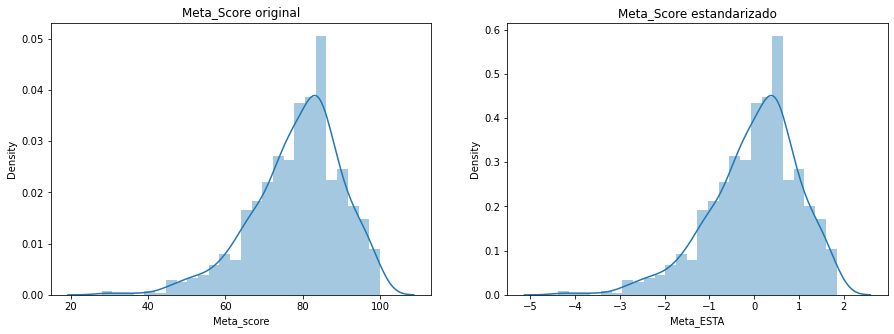

In [9]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Meta_Score original')
axes[1].set_title('Meta_Score estandarizado')

sns.distplot(variables_predictoras['Meta_score'] ,ax = axes[0])
sns.distplot(variables_predictoras['Meta_ESTA'], ax = axes[1]);

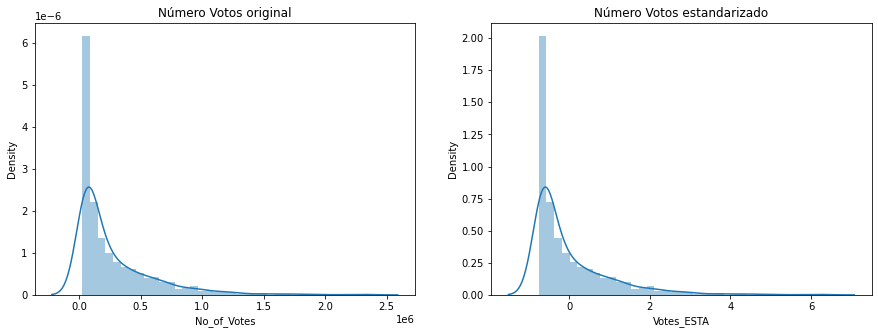

In [10]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Número Votos original')
axes[1].set_title('Número Votos estandarizado')

sns.distplot(variables_predictoras['No_of_Votes'] ,ax = axes[0])
sns.distplot(variables_predictoras['Votes_ESTA'], ax = axes[1]);

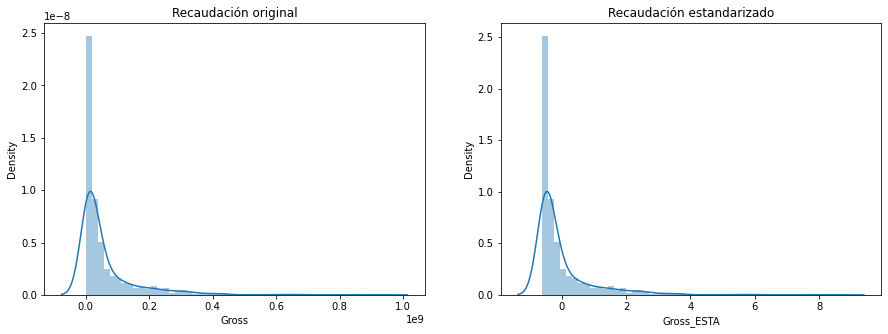

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))

axes[0].set_title('Recaudación original')
axes[1].set_title('Recaudación estandarizado')

sns.distplot(variables_predictoras['Gross'] ,ax = axes[0])
sns.distplot(variables_predictoras['Gross_ESTA'], ax = axes[1]);

<p>2.Sklearn Standard Scaler </p>

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

<p> Hemos hecho un subset que es predictoras1 con las variables predictoras quitando la estandarización manual que hemos hecho previamente para realizar la estandarización de Sklearn. Hemos hecho una llamada a la clase como scaler y ahora lo vamos a aplicar a las columnas elegidas. </p>

In [14]:
predictoras1 = variables_predictoras[['Meta_score','No_of_Votes','Gross']]
predictoras1.head(2)

,Meta_score,No_of_Votes,Gross
0,80.0,2343110.0,28341469.0
1,100.0,1620367.0,134966411.0


In [15]:
X_escaladas = scaler.fit_transform(predictoras1)

In [16]:
predictoras_estandar = pd.DataFrame(X_escaladas)
predictoras_estandar.head(2)

,0,1,2
0,0.113342,6.324451,-0.316171
1,1.841634,4.115639,0.734412


In [17]:
predictoras_estandar.rename(columns={0: "Meta_Sklstd", 1: "Votes_Sklstd", 2: "Gross_Sklstd"}, inplace= True)

In [18]:
predictoras_estandar.head(2)

,Meta_Sklstd,Votes_Sklstd,Gross_Sklstd
0,0.113342,6.324451,-0.316171
1,1.841634,4.115639,0.734412


In [19]:
predictoras_estandar.index

RangeIndex(start=0, stop=1000, step=1)

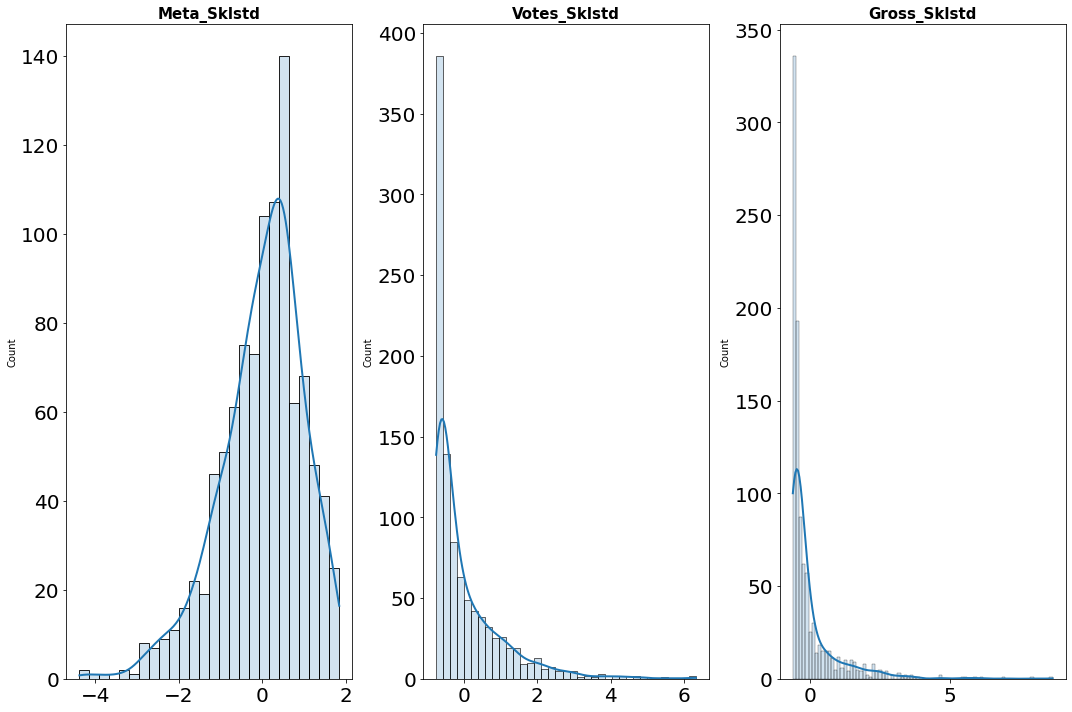

In [20]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 10))

columnas_estandar = predictoras_estandar.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = predictoras_estandar,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

<p>3.Sklearn Robust Scaler </p>

In [21]:
from sklearn.preprocessing import RobustScaler

In [22]:
robust = RobustScaler()

In [23]:
X_robust = robust.fit_transform(predictoras1)

In [24]:
predictoras_robust = pd.DataFrame(X_robust)
predictoras_robust.head(2)

,0,1,2
0,-0.001712,6.918768,0.131429
1,1.426860,4.650520,1.997227


In [25]:
predictoras_robust.rename(columns={0: "Meta_Sklrbt", 1: "Votes_Sklrbt", 2: "Gross_Sklrbt"}, inplace= True)

In [26]:
predictoras_robust.head(2)

,Meta_Sklrbt,Votes_Sklrbt,Gross_Sklrbt
0,-0.001712,6.918768,0.131429
1,1.426860,4.650520,1.997227


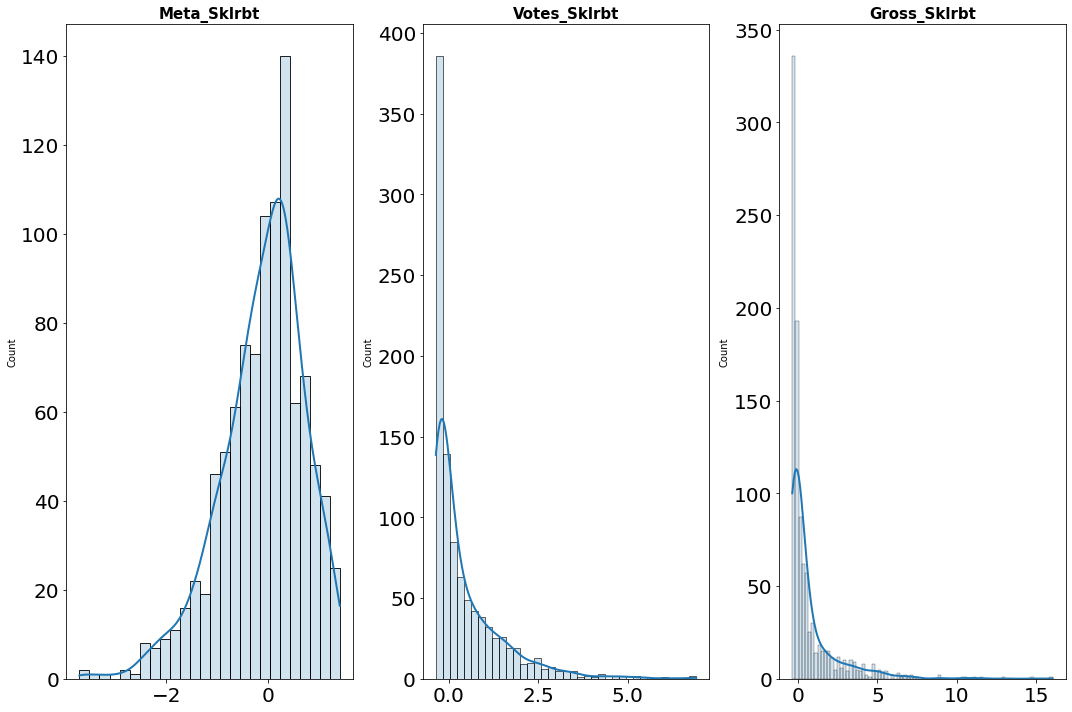

In [27]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 10))

columnas_estandar = predictoras_robust.columns
axes = axes.flat


for i, colum in enumerate(columnas_estandar): 
    sns.histplot(
        data = predictoras_robust,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")

fig.tight_layout()

In [28]:
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4',
       'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Gross', 'Rating_BOX'],
      dtype='object')

In [29]:
df.drop(["Rating_BOX"], axis=1, inplace=True)

In [30]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [31]:
predictoras_robust.index

RangeIndex(start=0, stop=1000, step=1)

In [32]:
predictoras_robust.shape

(1000, 3)

In [33]:
df.shape

(1000, 15)

In [34]:
predictoras_robust.head(2)

,Meta_Sklrbt,Votes_Sklrbt,Gross_Sklrbt
0,-0.001712,6.918768,0.131429
1,1.426860,4.650520,1.997227


In [35]:
df.head(2)

,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4,IMDB_Rating,Meta_score,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142 min,Drama,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,9.3,80.0,2343110.0,28341469.0
1,The Godfather,1972,A,175 min,"Crime, Drama",An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,9.2,100.0,1620367.0,134966411.0


In [45]:
df_concat = pd.concat([df,predictoras_robust], axis= 1)

In [46]:
df_concat.head(2)

,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4,IMDB_Rating,Meta_score,No_of_Votes,Gross,Meta_Sklrbt,Votes_Sklrbt,Gross_Sklrbt
0,The Shawshank Redemption,1994,A,142 min,Drama,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,9.3,80.0,2343110.0,28341469.0,-0.001712,6.918768,0.131429
1,The Godfather,1972,A,175 min,"Crime, Drama",An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,9.2,100.0,1620367.0,134966411.0,1.426860,4.650520,1.997227


In [42]:
df_join = df.join(predictoras_robust)

In [43]:
df_join.head(2)

,Series_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4,IMDB_Rating,Meta_score,No_of_Votes,Gross,Meta_Sklrbt,Votes_Sklrbt,Gross_Sklrbt
0,The Shawshank Redemption,1994,A,142 min,Drama,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,9.3,80.0,2343110.0,28341469.0,-0.001712,6.918768,0.131429
1,The Godfather,1972,A,175 min,"Crime, Drama",An organized crime dynasty's aging patriarch t...,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,9.2,100.0,1620367.0,134966411.0,1.426860,4.650520,1.997227


In [44]:
df_join.isna().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
Overview         0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
IMDB_Rating      0
Meta_score       0
No_of_Votes      0
Gross            0
Meta_Sklrbt      0
Votes_Sklrbt     0
Gross_Sklrbt     0
dtype: int64

<p>Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings</p>

In [47]:
df.to_pickle("datos/peliculas_limpio.pkl")